In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('PEP1.csv')

## Understand the dataset

### Identify the shape of the dataset - view the number of rows and columns

In [3]:
df.shape

(1460, 81)

### Printing column names which have null values

In [4]:
ser_colName_hasNull = df.isnull().any()
for colName, hasNullValues in ser_colName_hasNull.items():
    if hasNullValues == True:
        print(colName)

LotFrontage
Alley
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


### Identify variables with unique values

In [5]:
list_unique_cols = []
for col in df.columns:
    if sum(df[col].value_counts()!=1)== 0:
        list_unique_cols.append(col)
list_unique_cols

['Id']

## Generate a separate dataset for numerical and categorical variables 

In [6]:
#Splitting dataframe into numerical and categorical datasets
numerical_columns = []
categorical_columns = []

for column in df.columns:
    if(len(df[column].value_counts())>20):
        numerical_columns.append(column)
    else:
        categorical_columns.append(column)


numerical_columns.remove('Neighborhood')
categorical_columns.append('Neighborhood')

categorical_columns.append('SalePrice') #Appending the response variable to categorical column dataframe

df_numerical_columns = pd.DataFrame(data = df, columns = numerical_columns)
df_categorical_columns = pd.DataFrame(data = df, columns = categorical_columns)

## EDA of Numerical Variables
### a. Missing Value Treatment (replace missing values with the median value)

In [7]:
ser_colName_hasNull = df_numerical_columns.isnull().any()
for colName, hasNullValues in ser_colName_hasNull.items():
    if hasNullValues == True:
        df_numerical_columns[colName].fillna(df_numerical_columns[colName].median(), inplace = True)

In [8]:
ser_colName_hasNull = df_categorical_columns.isna().sum()
for colName, countNullValues in ser_colName_hasNull.items():
    if countNullValues > 0:
        print(colName, "       ", countNullValues)

Alley         1369
MasVnrType         8
BsmtQual         37
BsmtCond         37
BsmtExposure         38
BsmtFinType1         37
BsmtFinType2         38
Electrical         1
FireplaceQu         690
GarageType         81
GarageFinish         81
GarageQual         81
GarageCond         81
PoolQC         1453
Fence         1179
MiscFeature         1406


### b. Identify the skewness and distribution

In [9]:
df_numerical_columns.skew(axis=0)

Id                0.000000
LotFrontage       2.409147
LotArea          12.207688
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.677616
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
GarageYrBlt      -0.678333
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
ScreenPorch       4.122214
MiscVal          24.476794
SalePrice         1.882876
dtype: float64

In [10]:
df_numerical_columns.describe().round(1)

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,SalePrice
count,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,...,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0
mean,730.5,69.9,10516.8,1971.3,1984.9,103.1,443.6,46.5,567.2,1057.4,...,5.8,1515.5,1978.6,473.0,94.2,46.7,22.0,15.1,43.5,180921.2
std,421.6,22.0,9981.3,30.2,20.6,180.7,456.1,161.3,441.9,438.7,...,48.6,525.5,24.0,213.8,125.3,66.3,61.1,55.8,496.1,79442.5
min,1.0,21.0,1300.0,1872.0,1950.0,0.0,0.0,0.0,0.0,0.0,...,0.0,334.0,1900.0,0.0,0.0,0.0,0.0,0.0,0.0,34900.0
25%,365.8,60.0,7553.5,1954.0,1967.0,0.0,0.0,0.0,223.0,795.8,...,0.0,1129.5,1962.0,334.5,0.0,0.0,0.0,0.0,0.0,129975.0
50%,730.5,69.0,9478.5,1973.0,1994.0,0.0,383.5,0.0,477.5,991.5,...,0.0,1464.0,1980.0,480.0,0.0,25.0,0.0,0.0,0.0,163000.0
75%,1095.2,79.0,11601.5,2000.0,2004.0,164.2,712.2,0.0,808.0,1298.2,...,0.0,1776.8,2001.0,576.0,168.0,68.0,0.0,0.0,0.0,214000.0
max,1460.0,313.0,215245.0,2010.0,2010.0,1600.0,5644.0,1474.0,2336.0,6110.0,...,572.0,5642.0,2010.0,1418.0,857.0,547.0,552.0,480.0,15500.0,755000.0


### c. Identify the significant variables using correlation matrix

Before creating the correlation matrix, we will first be standardizing the data set and then look at the correlations. Standardization formula : 

       $z_i = (x_i - \mu) / \sigma$

       
We will use StandardScalar from SK Learn to achieve this standardization

In [11]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

arr = ss.fit_transform(df_numerical_columns)

df_standardized_numerical_columns = pd.DataFrame(arr, columns = numerical_columns)

#### Now computing the correlation matrix and plotting on a heatmap

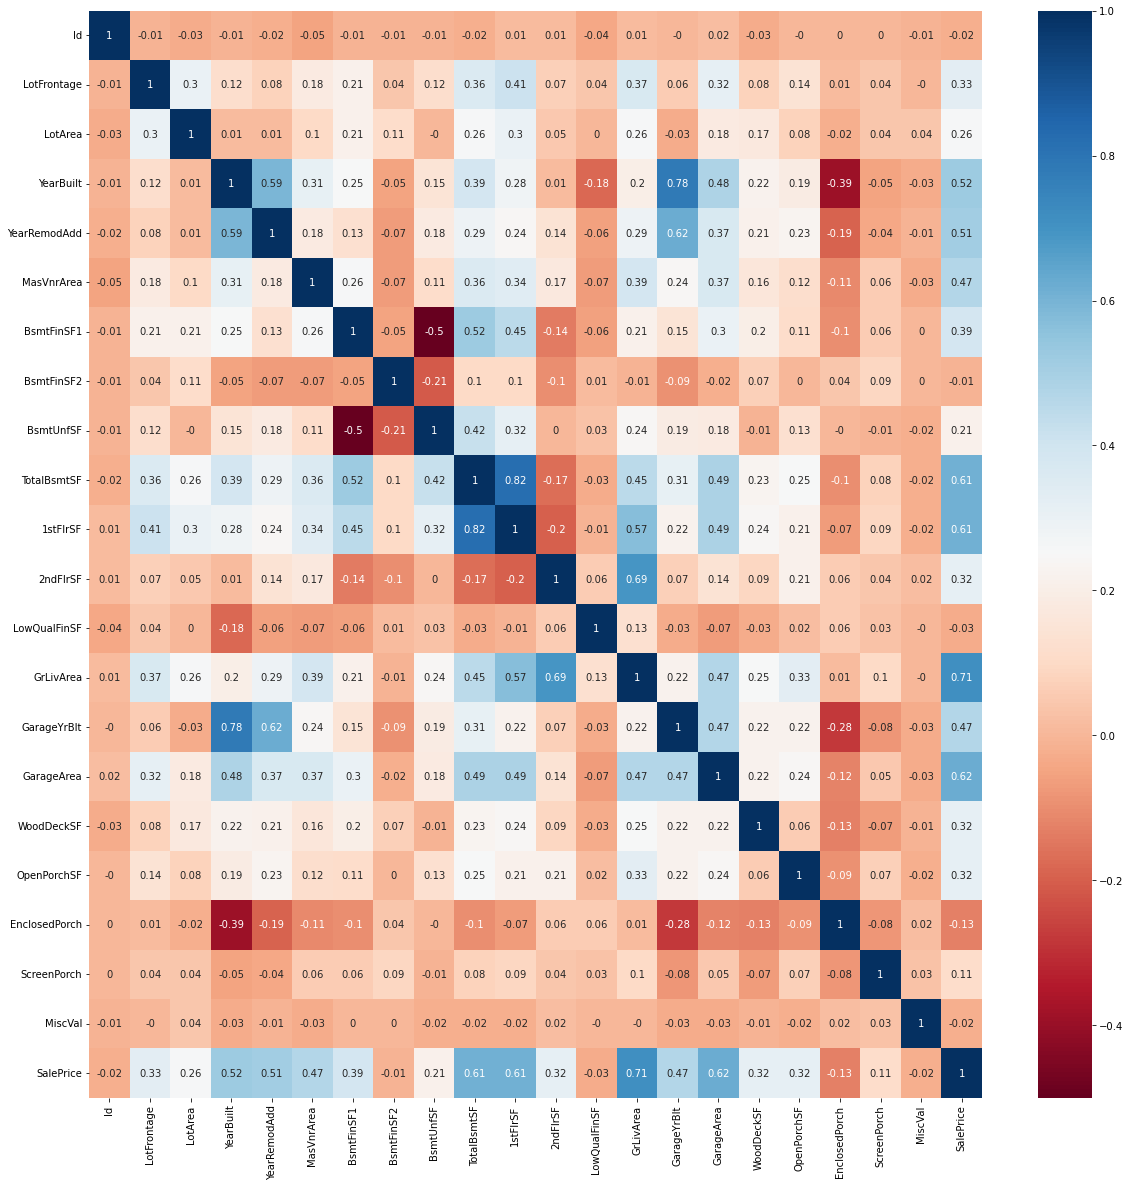

In [12]:
correlation_matrix = df_standardized_numerical_columns.corr().round(2)
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True, cmap = 'RdBu')
plt.show()

### Observations from the above correlation heatmap: Identification of significant variables impacting sale price

#### The numerical features that are significant, with >0.6 correlation with sale price are:
   - GarageArea (0.62)
   - GrLivArea (0.71)
   - 1stFlrSF (0.61)
   - TotalBsmtSF (0.61)

### d. Pair plot for distribution and density

In this excercise, I will use only the 4 significant variables for plotting. Also, I will use original data prior to standardization. This is because all of this is based on square feet and should be of similar scales. Plus, having relevant data legends on the axes will help me understand the information better

#### 1.Plotting based on original dataset

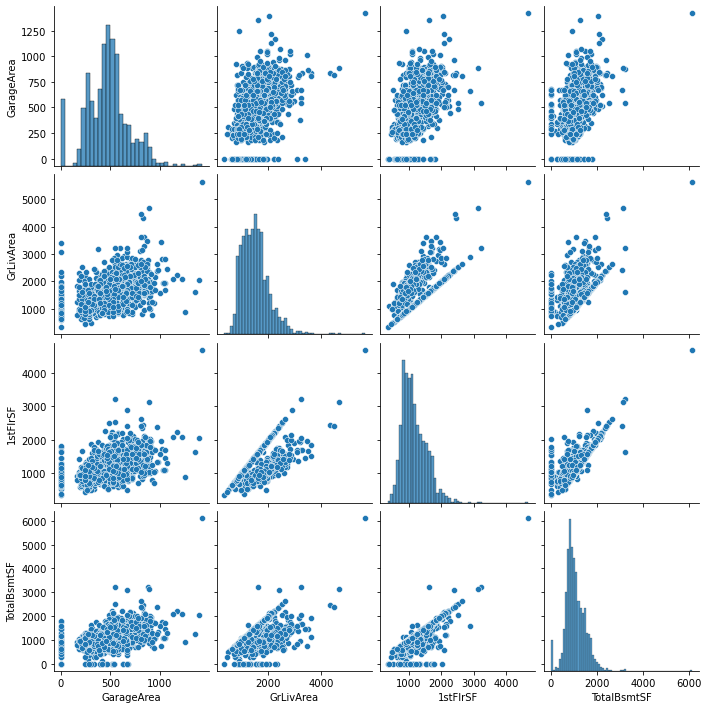

In [13]:
df_significant_numerical = pd.DataFrame(df_numerical_columns,
                                                     columns = ['GarageArea', 'GrLivArea', '1stFlrSF', 'TotalBsmtSF'])

sns.pairplot (df_significant_numerical)
plt.show()

#### Study of the above pair plots

- **GarageArea:** A large majority of houses do have garages, though there are many houses that do not have garages. <u><i>This is an important piece of information while doing missing value treatment of garage related categorical variables</i></u> 
- **GroundArea vs Total Basement Area and 1st Floor Sq Ft:** Typical houses have larger ground floor, and then relatively smaller 1st floor are and then even smaller basement area. All houses have a ground floor and a 1st floor, but there is a small number of houses that do not have a basement. <u><i>Since there are houses without a basement, this needs to be taken into account while doing missing values treatment for basement related categorical variables</i></u>

## EDA of Categorical Variables

### a. Missing Value Treatment (replacing missing values with mode value)

#### First taking a look at all the categorical columns

In [14]:
categorical_columns

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchebvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functiol',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 '3SsnPorch',
 'PoolArea',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition',
 'Neighborhood',
 'SalePrice']

#### Let's take a look at missing values for each of the categorical variables, this is to understand whether the features intentionally have missing values or is it a data entry error. This is because some of the categorical variables related to Garage and Basement may be missing because those entities do not have Garage or Basement

In [15]:
ser_colName_hasNull = df_categorical_columns.isna().sum()
null_columns_array = []
for colName, countNullValues in ser_colName_hasNull.items():
    if countNullValues > 0:
        print(colName, "       ", countNullValues)
        null_columns_array.append(colName)

Alley         1369
MasVnrType         8
BsmtQual         37
BsmtCond         37
BsmtExposure         38
BsmtFinType1         37
BsmtFinType2         38
Electrical         1
FireplaceQu         690
GarageType         81
GarageFinish         81
GarageQual         81
GarageCond         81
PoolQC         1453
Fence         1179
MiscFeature         1406


<span style="color:FireBrick"> <u><i> **Looking at the above list, there seems to be a high chance that many of the above features are simply not available in the given houses.** </i></u></span>

<span style="color:FireBrick">  For example, 37 houses may not have Basement. We saw this situation during analysis of numerical variables.  </span>

<span style="color:FireBrick">  Similarly 81 houses likely do not have garages. Even features such as Alley, Fireplace, Fence & Pool may not be applicable to many houses.  </span>

<span style="color:FireBrick">  Hence doing a standard missing values treatment for categorical_variables where the Null values are replaced with mode value may not be the best solution.  </span>

<span style="color:FireBrick"> <u>**Update: Checking data_description text file confirms above assumptions**</u></span>

### Missing Values Treatment

In [16]:
df_categorical_columns[null_columns_array].head()

,Alley,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,NaN,BrkFace,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,RFn,TA,TA,NaN,NaN,NaN
1,NaN,None,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN
2,NaN,BrkFace,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN
3,NaN,None,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,Unf,TA,TA,NaN,NaN,NaN
4,NaN,BrkFace,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN


In [17]:
for colName in null_columns_array:
    df_categorical_columns[colName].fillna(list(df_categorical_columns[colName].mode())[0], inplace = True)

***Doing some more EDA on Categorical Variables based on data_description text file before any bivariate analysis***

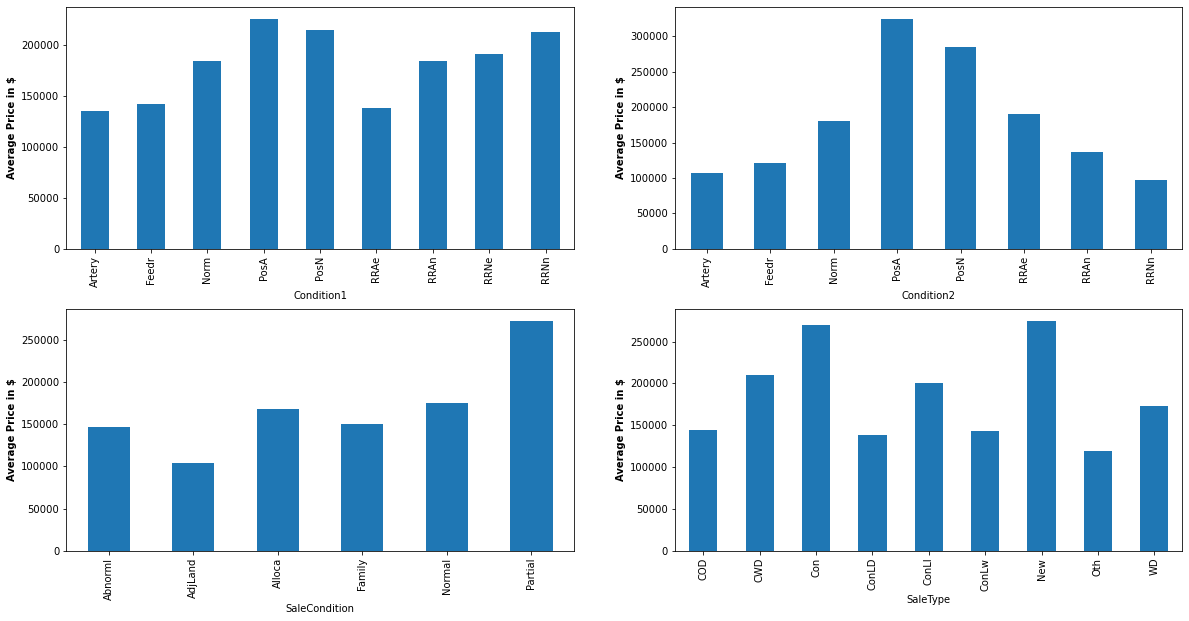

In [18]:
plt.figure(figsize = (20,10))
plt.subplots_adjust(hspace=0.25)
plt.subplot(2,2,1)
plt.ylabel("Average Price in $", fontweight='bold')
df_categorical_columns.groupby("Condition1").mean()["SalePrice"].plot(kind = "bar")
plt.subplot(2,2,2)
plt.ylabel("Average Price in $", fontweight='bold')
df_categorical_columns.groupby("Condition2").mean()["SalePrice"].plot(kind = "bar")
plt.subplot(2,2,3)
plt.ylabel("Average Price in $", fontweight='bold')
df_categorical_columns.groupby("SaleCondition").mean()["SalePrice"].plot(kind = "bar")
plt.subplot(2,2,4)
plt.ylabel("Average Price in $", fontweight='bold')
df_categorical_columns.groupby("SaleType").mean()["SalePrice"].plot(kind = "bar")
plt.show()

#### From the above, it seems that having an additional (2nd condition) in the proximity, especially positive offsite feature (PosA & PosN) has a strong positive impact on the price

#### Also, proximity to one Railroad track (RRAn, RRNn) has a positive impact, but having an additional Railroad track nearby does not have positive impact on price.

#### It is also apparent from the bottom two charts that the partially completed homes, i.e. the newer homes tend to fetch a higher price

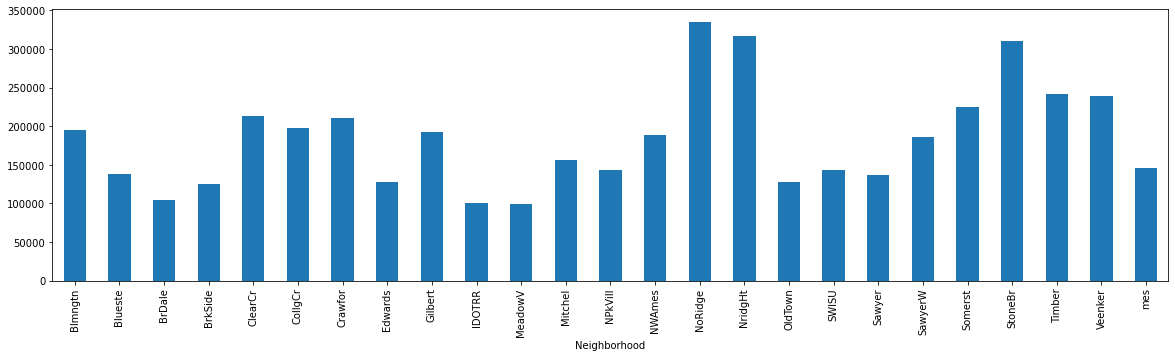

In [19]:
plt.figure(figsize = (20,5))
df_categorical_columns.groupby("Neighborhood").mean()["SalePrice"].plot(kind = "bar")
plt.show()

#### Areas Northridge, Northridge Heights and Stone Brook are significantly more expensive



### Assessing a few more features for their impact on Sale Price

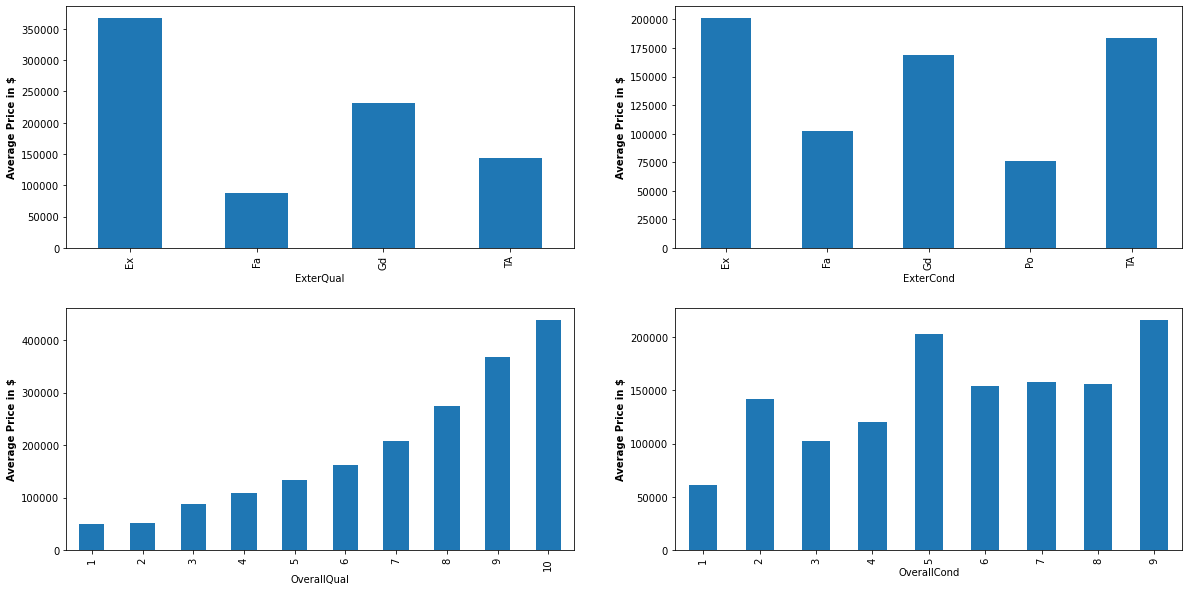

In [20]:
plt.figure(figsize = (20,10))
plt.subplots_adjust(hspace=0.25)
plt.subplot(2,2,1)
plt.ylabel("Average Price in $", fontweight='bold')
df_categorical_columns.groupby("ExterQual").mean()["SalePrice"].plot(kind = "bar")
plt.subplot(2,2,2)
plt.ylabel("Average Price in $", fontweight='bold')
df_categorical_columns.groupby("ExterCond").mean()["SalePrice"].plot(kind = "bar")
plt.subplot(2,2,3)
plt.ylabel("Average Price in $", fontweight='bold')
df_categorical_columns.groupby("OverallQual").mean()["SalePrice"].plot(kind = "bar")
plt.subplot(2,2,4)
plt.ylabel("Average Price in $", fontweight='bold')
df_categorical_columns.groupby("OverallCond").mean()["SalePrice"].plot(kind = "bar")
plt.show()

### The above variables uncover a lot of useful information
- **External quality** as excellent fetches a disproportionate high price, external quality as good also fetches reasonably good price for the property
- **External condition** excellent, good and average fetch higher prices than external condition fair and poor
- **Overall quality** is a very powerful predictor of price as price seems directly proportional to the overall quality of the house
- **Overall condition** at 5 and above fetches higher price than condition rating below 5

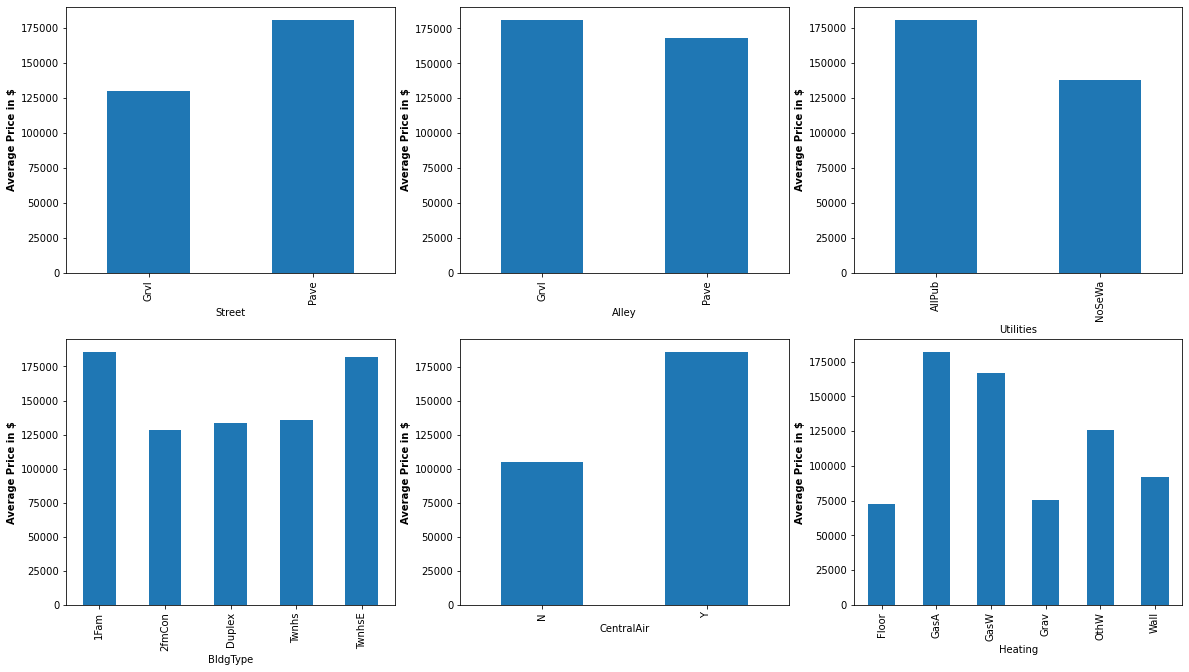

In [21]:
plt.figure(figsize = (20,11))
plt.subplots_adjust(hspace=0.25)
plt.subplot(2,3,1)
plt.ylabel("Average Price in $", fontweight='bold')
df_categorical_columns.groupby("Street").mean()["SalePrice"].plot(kind = "bar")
plt.subplot(2,3,2)
plt.ylabel("Average Price in $", fontweight='bold')
df_categorical_columns.groupby("Alley").mean()["SalePrice"].plot(kind = "bar")
plt.subplot(2,3,3)
plt.ylabel("Average Price in $", fontweight='bold')
df_categorical_columns.groupby("Utilities").mean()["SalePrice"].plot(kind = "bar")
plt.subplot(2,3,4)
plt.ylabel("Average Price in $", fontweight='bold')
df_categorical_columns.groupby("BldgType").mean()["SalePrice"].plot(kind = "bar")
plt.subplot(2,3,5)
plt.ylabel("Average Price in $", fontweight='bold')
df_categorical_columns.groupby("CentralAir").mean()["SalePrice"].plot(kind = "bar")
plt.subplot(2,3,6)
plt.ylabel("Average Price in $", fontweight='bold')
df_categorical_columns.groupby("Heating").mean()["SalePrice"].plot(kind = "bar")
plt.show()

### b. Count plot for Bivariate Analysis

#### Bivariate analysis on External Quality and External Condition

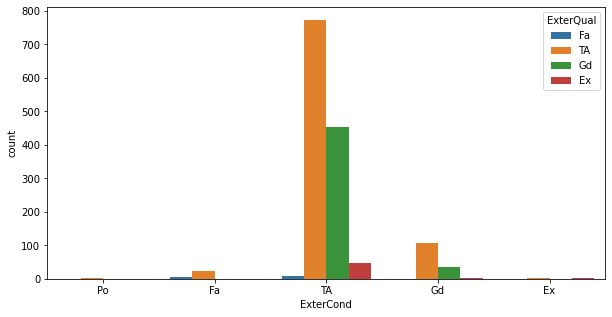

In [22]:
plt.figure(figsize = (10,5))
sns.countplot("ExterCond", hue = "ExterQual", data = df_categorical_columns, 
              order = ['Po', 'Fa', 'TA', 'Gd', 'Ex'], hue_order = ['Fa', 'TA', 'Gd', 'Ex'])
plt.show()

#### Bivariate analysis on External Quality & External Condition

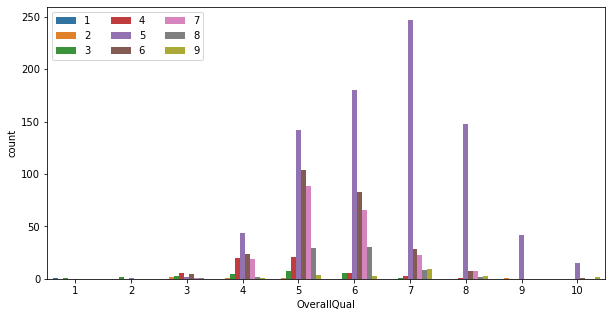

In [23]:
plt.figure(figsize = (10,5))
sns.countplot("OverallQual", hue = "OverallCond", data = df_categorical_columns)
plt.legend(loc = 'upper left', ncol=3)
plt.show()

### Boxplot for bivariate analysis

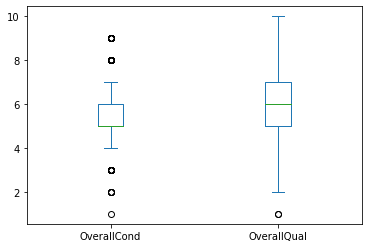

In [24]:
df_categorical_columns[['OverallCond',  'OverallQual']].plot(kind = 'box')
plt.show()

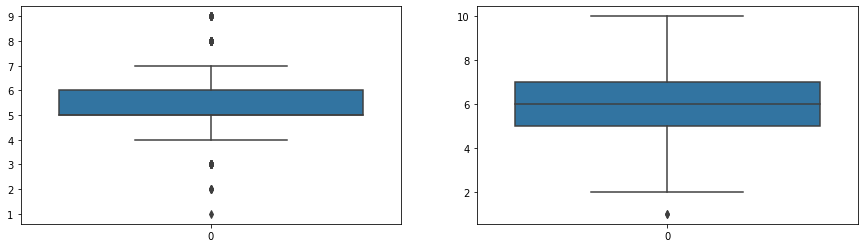

In [25]:
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.boxplot(data = df_categorical_columns['OverallCond'])
plt.subplot(1,2,2)
sns.boxplot(data = df_categorical_columns['OverallQual'])
plt.show()

### c. P-value and chi-squared tests to identify significant variables

<b>Note that chi-squared tests are used to check relationship between two catgorical variables</b>

In [26]:
import scipy.stats as stats

In [27]:
quality_condition_table = pd.crosstab(index = df_categorical_columns['OverallCond'], 
                                      columns= df_categorical_columns['OverallQual'], margins = True)
quality_condition_table

OverallQual,1,2,3,4,5,6,7,8,9,10,All
OverallCond,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,1
2,0,0,2,1,1,0,0,0,1,0,5
3,1,2,3,5,7,6,1,0,0,0,25
4,0,0,6,20,21,6,3,1,0,0,57
5,0,1,2,44,142,180,247,148,42,15,821
6,0,0,5,24,104,83,28,7,0,1,252
7,0,0,1,19,89,66,23,7,0,0,205
8,0,0,1,2,29,30,8,2,0,0,72
9,0,0,0,1,4,3,9,3,0,2,22


In [28]:
chi_sq, p_value, dof, expected_frequencies = stats.chi2_contingency(quality_condition_table)

In [29]:
print(chi_sq)
print(p_value)

1322.0585284633244
4.1078439110801887e-218


In [30]:
if(p_value<.05):
    print("H0 rejected. There is a relationship between Overall Quality and Overall Condition")

H0 rejected. There is a relationship between Overall Quality and Overall Condition


In [31]:
significant_variables = []
print('Significant Variables: ')

for col in df_categorical_columns.columns:
    if col == 'SalePrice': #Skip if the column == Response Variable
        continue
    variable_target_table = pd.crosstab(df_categorical_columns[col], 
                                        df_categorical_columns['SalePrice'],  margins = True)
    chi_sq, p_value, dof, expected_frequencies = stats.chi2_contingency(variable_target_table)
    if(p_value<.05):
        significant_variables.append(col)
        print(col)

Significant Variables: 
OverallQual
OverallCond
ExterQual
Heating
FullBath
KitchenQual
TotRmsAbvGrd
GarageCars
Neighborhood


#### The above variables are significant as the p_value for these variables < 0.05. These variables will be used for building the final model

In [32]:
df_categorical_significant = df_categorical_columns[significant_variables]

In [33]:
df_categorical_significant.head()

,OverallQual,OverallCond,ExterQual,Heating,FullBath,KitchenQual,TotRmsAbvGrd,GarageCars,Neighborhood
0,7,5,Gd,GasA,2,Gd,8,2,CollgCr
1,6,8,TA,GasA,2,TA,6,2,Veenker
2,7,5,Gd,GasA,2,Gd,6,2,CollgCr
3,7,5,TA,GasA,1,Gd,7,3,Crawfor
4,8,5,Gd,GasA,2,Gd,9,3,NoRidge


In [34]:
df_significant_numerical.head()

,GarageArea,GrLivArea,1stFlrSF,TotalBsmtSF
0,548,1710,856,856
1,460,1262,1262,1262
2,608,1786,920,920
3,642,1717,961,756
4,836,2198,1145,1145


## 5. Combining the numerical and categorical columns to form a new dataset

In [35]:
df_significant_variables = pd.concat([df_significant_numerical, df_categorical_significant], axis=1, join='inner')

In [36]:
df_significant_variables['SalePrice'] = df_categorical_columns['SalePrice']

In [37]:
df_significant_variables.head()

,GarageArea,GrLivArea,1stFlrSF,TotalBsmtSF,OverallQual,OverallCond,ExterQual,Heating,FullBath,KitchenQual,TotRmsAbvGrd,GarageCars,Neighborhood,SalePrice
0,548,1710,856,856,7,5,Gd,GasA,2,Gd,8,2,CollgCr,208500
1,460,1262,1262,1262,6,8,TA,GasA,2,TA,6,2,Veenker,181500
2,608,1786,920,920,7,5,Gd,GasA,2,Gd,6,2,CollgCr,223500
3,642,1717,961,756,7,5,TA,GasA,1,Gd,7,3,Crawfor,140000
4,836,2198,1145,1145,8,5,Gd,GasA,2,Gd,9,3,NoRidge,250000


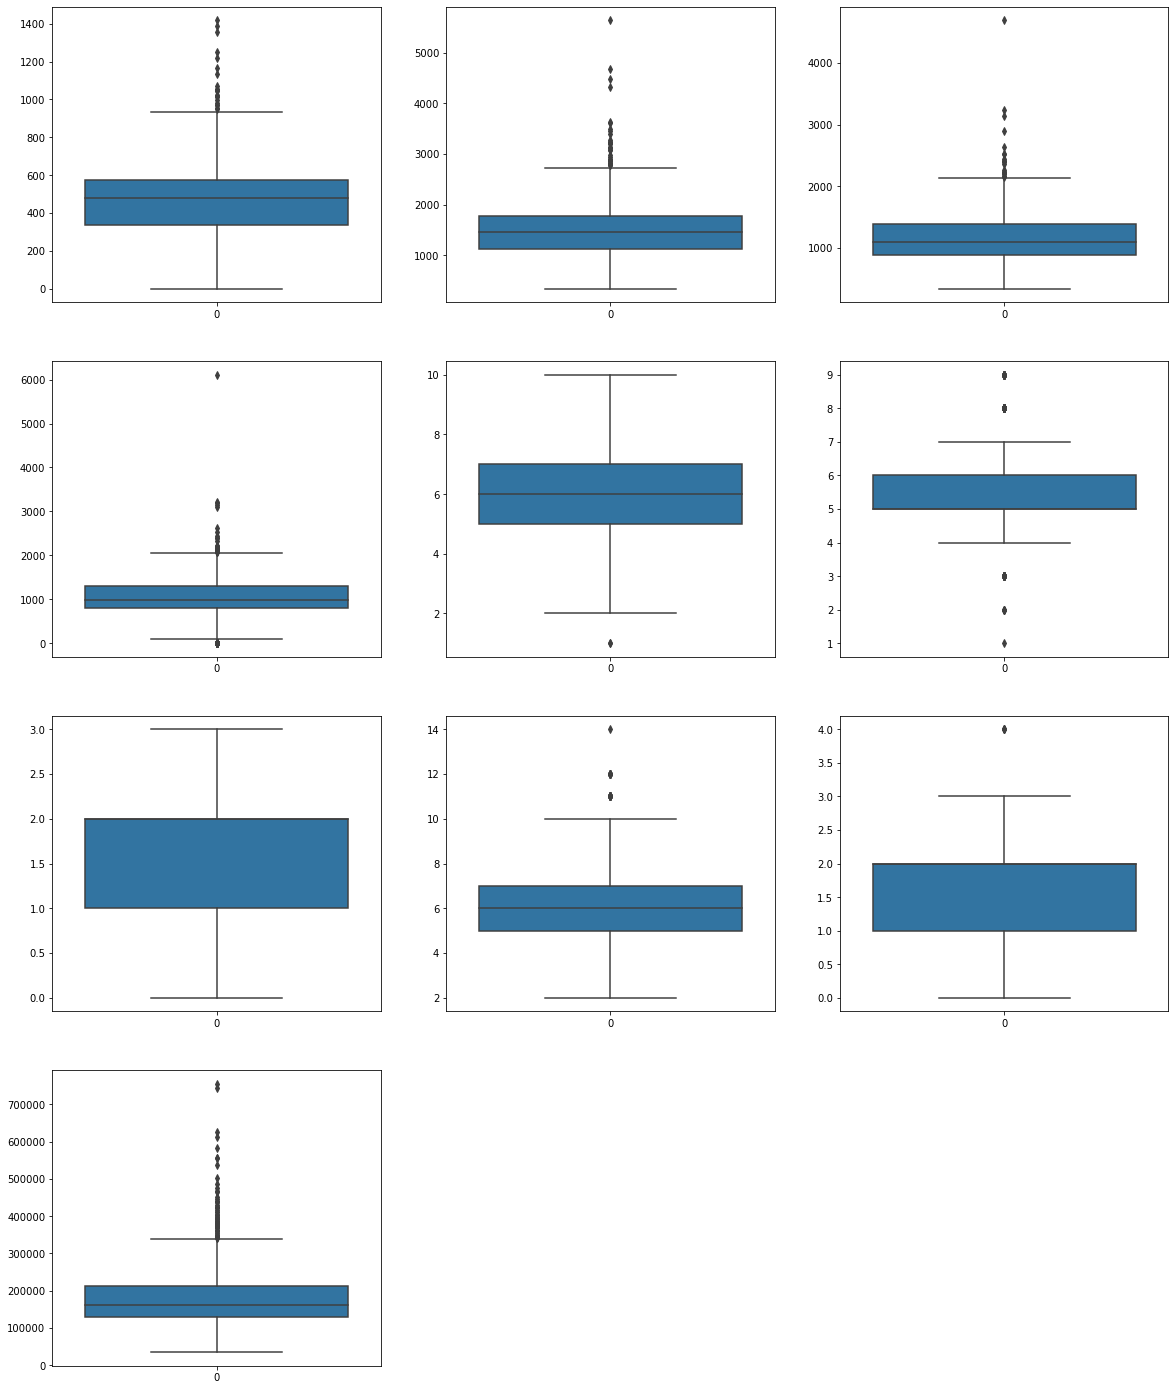

In [38]:
columns_with_numerical_values = ['GarageArea', 'GrLivArea', '1stFlrSF', 'TotalBsmtSF', 'OverallQual', 'OverallCond',
                                'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'SalePrice']
num_col = len(columns_with_numerical_values)
plt.figure(figsize = (20,25))
count = 0
for col in columns_with_numerical_values:
    count = count + 1
    plt.subplot(4,3,count)
    sns.boxplot(data = df_significant_variables[col])
plt.show()

### Just for practice
#### Plotting multiple columns using a single iterative loop

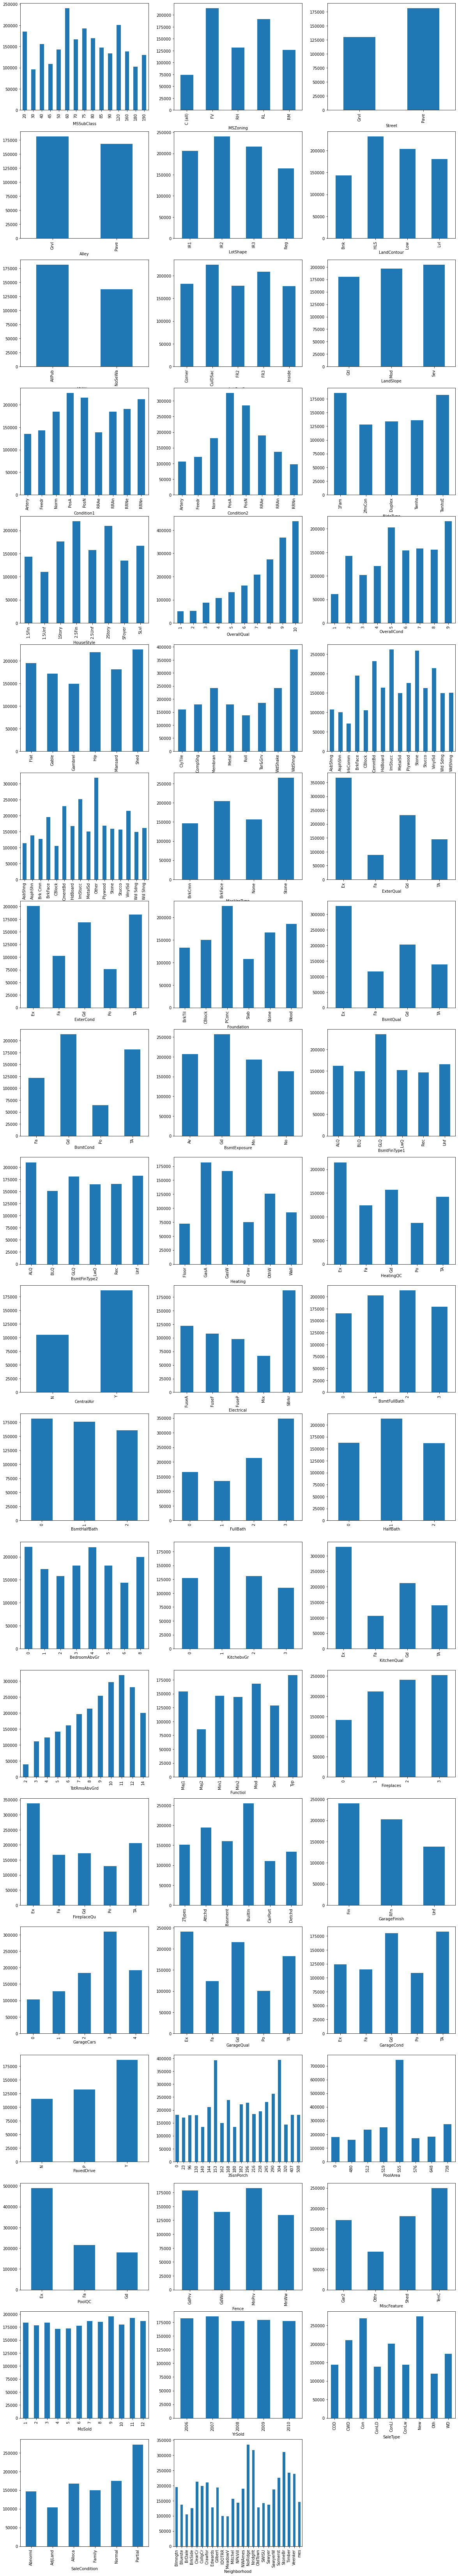

In [39]:
num_cat_col = len(df_categorical_columns.columns)
plt.figure(figsize = (20,120))
count = 0
for col in df_categorical_columns.columns:
    if col == 'SalePrice': #Skip if the column == Response Variable
        continue
    count = count + 1
    plt.subplot(20,3,count)
    df_categorical_columns.groupby(col).mean()["SalePrice"].plot(kind = "bar")
    
plt.show()